<a href="https://colab.research.google.com/github/JosueM028/yolov8-aerial-analysis/blob/main/Tarea6_Deteccion_Autos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Instalar la librería YOLOv8 (Ultralytics)
%pip install ultralytics
import ultralytics
ultralytics.checks()

# 2. Descomprimir el dataset que acabas de subir
# El -q es para que no imprima miles de líneas (modo silencioso)
!unzip -q dataset_final_yolo.zip -d /content/
print("¡Dataset descomprimido correctamente!")

Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.2/112.6 GB disk)
[dataset_final_yolo.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of dataset_final_yolo.zip or
        dataset_final_yolo.zip.zip, and cannot find dataset_final_yolo.zip.ZIP, period.
¡Dataset descomprimido correctamente!


In [2]:
import yaml
import os

# Definimos la configuración
# 'path' debe ser la ruta absoluta en Colab
yaml_config = {
    'path': '/content/dataset_final_yolo',
    'train': 'images/train',
    'val': 'images/val',
    'names': {
        0: 'Carro'  # Definimos que la clase 0 es 'Carro'
    }
}

# Guardamos el archivo
with open('/content/data.yaml', 'w') as f:
    yaml.dump(yaml_config, f)

print("Archivo data.yaml creado con éxito.")

Archivo data.yaml creado con éxito.


In [4]:
import os
import glob

# 1. VERIFICAR QUÉ HAY EN EL DISCO
print("📂 Archivos en /content/:", os.listdir('/content/'))

# 2. BUSCAR EL ARCHIVO ZIP (No importa si le cambiaste el nombre)
zip_files = glob.glob('/content/*.zip')
tar_files = glob.glob('/content/*.tar.gz')

if zip_files:
    archivo_zip = zip_files[0]
    print(f"✅ Archivo ZIP encontrado: {archivo_zip}")
    print("⏳ Descomprimiendo... (esto puede tardar unos segundos)")
    # Descomprimimos forzando sobreescritura (-o)
    os.system(f'unzip -o -q "{archivo_zip}" -d /content/')
    print("✅ Descompresión terminada.")
elif tar_files:
    archivo_tar = tar_files[0]
    print(f"✅ Archivo TAR encontrado: {archivo_tar}")
    os.system(f'tar -xzf "{archivo_tar}" -C /content/')
    print("✅ Descompresión terminada.")
else:
    print("❌ ERROR: No se encontró ningún archivo .zip o .tar.gz en el panel de archivos.")
    print("👉 Por favor, arrastra tu archivo dataset_final_yolo.zip al panel izquierdo.")

# 3. VERIFICAR ESTRUCTURA DE CARPETAS
# A veces Windows crea carpetas dobles (ej: dataset/dataset/images)
if os.path.exists('/content/dataset_final_yolo/dataset_final_yolo'):
    print("⚠️ Detectada carpeta anidada duplicada. Corrigiendo...")
    os.system('mv /content/dataset_final_yolo/dataset_final_yolo/* /content/dataset_final_yolo/')

# 4. CONFIRMAR QUE EXISTEN LAS RUTAS
if os.path.exists('/content/dataset_final_yolo/images/val'):
    print("\n🎉 ¡ESTRUCTURA CORRECTA! Ya puedes volver a ejecutar la celda de entrenamiento.")
    print(f"Ruta verificada: {os.path.abspath('/content/dataset_final_yolo/images/val')}")
else:
    print("\n❌ Aún no encuentro la carpeta 'images/val'.")
    print("Revisa el nombre de la carpeta que se creó:")
    print(os.listdir('/content/'))

📂 Archivos en /content/: ['.config', 'dataset_final_yolo.zip', 'runs', 'data.yaml', 'yolov8n.pt']
✅ Archivo ZIP encontrado: /content/dataset_final_yolo.zip
⏳ Descomprimiendo... (esto puede tardar unos segundos)
✅ Descompresión terminada.

🎉 ¡ESTRUCTURA CORRECTA! Ya puedes volver a ejecutar la celda de entrenamiento.
Ruta verificada: /content/dataset_final_yolo/images/val


In [5]:
from ultralytics import YOLO

# Cargar el modelo base pre-entrenado
model = YOLO('yolov8n.pt')

# Entrenar
# epochs=25: El modelo verá las fotos 25 veces.
# imgsz=640: Tamaño estándar de imagen para YOLO.
results = model.train(data='/content/data.yaml', epochs=25, imgsz=640)


Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pret

Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3078.1±736.8 MB/s, size: 1341.4 KB)
val: Scanning /content/dataset_final_yolo/labels/val.cache... 31 images, 0 backgrounds, 22 corrupt: 100% ━━━━━━━━━━━━ 31/31 67.2Kit/s 0.0s
val: /content/dataset_final_yolo/images/val/DJI-00760-00021.jpg: ignoring corrupt image/label: Label class 3 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/dataset_final_yolo/images/val/DJI-00760-00022.jpg: ignoring corrupt image/label: Label class 3 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/dataset_final_yolo/images/val/DJI-00760-00039.jpg: ignoring corrupt image/label: Label class 3 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/dataset_final_yolo/images/val/DJI_0005-0070.jpg: ignoring corrupt image/label: Label cla

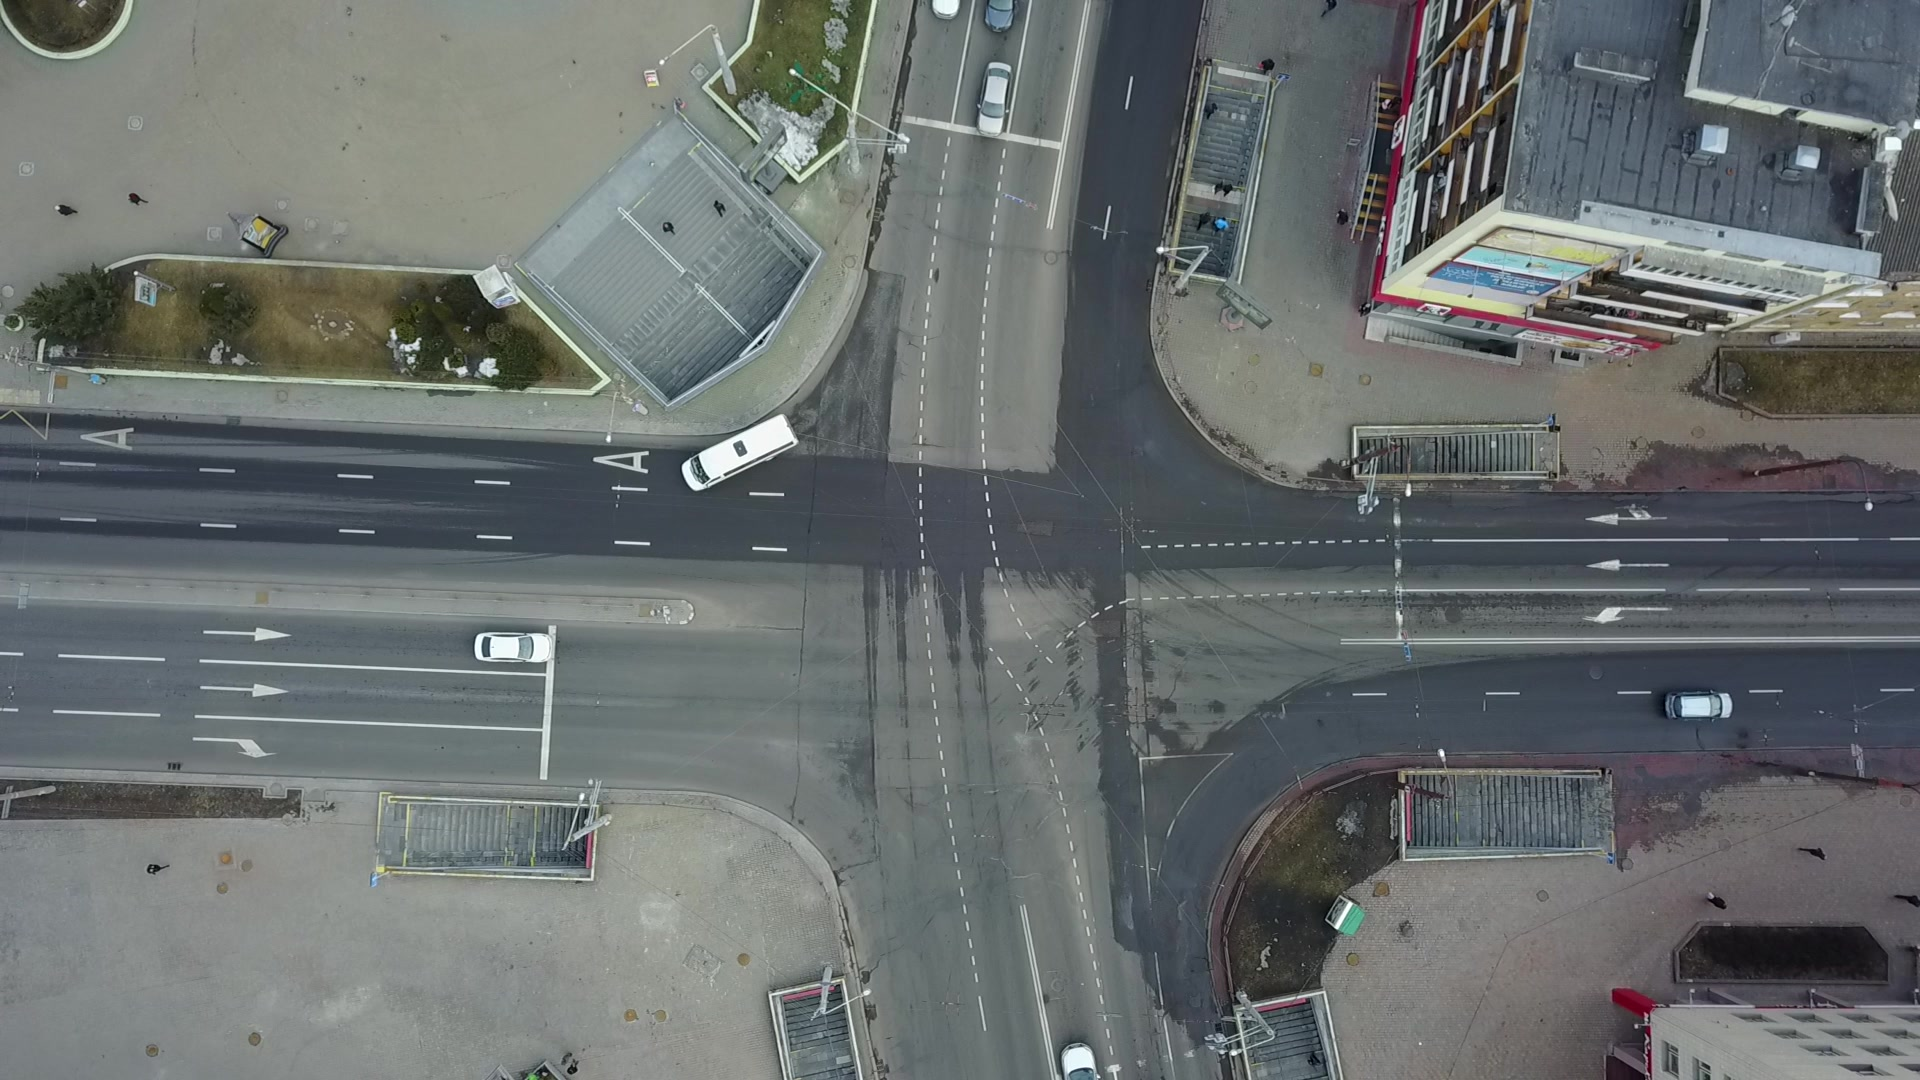

In [6]:
from PIL import Image

# 1. Validar: Ver qué tan bien aprendió el modelo
metrics = model.val()
print(f"Precisión media (mAP50): {metrics.box.map50}")

# 2. Exportar a ONNX (como pide la documentación que compartiste)
success = model.export(format='onnx')
print(f"Modelo exportado exitosamente: {success}")

# 3. PRUEBA DE DETECCIÓN (Inferencia)
# Vamos a tomar una imagen de validación al azar para probar
import glob
import random

val_images = glob.glob('/content/dataset_final_yolo/images/val/*.jpg')
test_image = random.choice(val_images)

# Ejecutar la detección
results = model(test_image)

# Mostrar el resultado
# En Colab, usamos .plot() y PIL para ver la imagen resultante
res_plotted = results[0].plot()
display(Image.fromarray(res_plotted[..., ::-1])) # Convertir BGR a RGB para mostrar bien


image 1/1 /content/dataset_final_yolo/images/val/DJI_0005-0071.jpg: 384x640 (no detections), 6.7ms
Speed: 2.4ms preprocess, 6.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


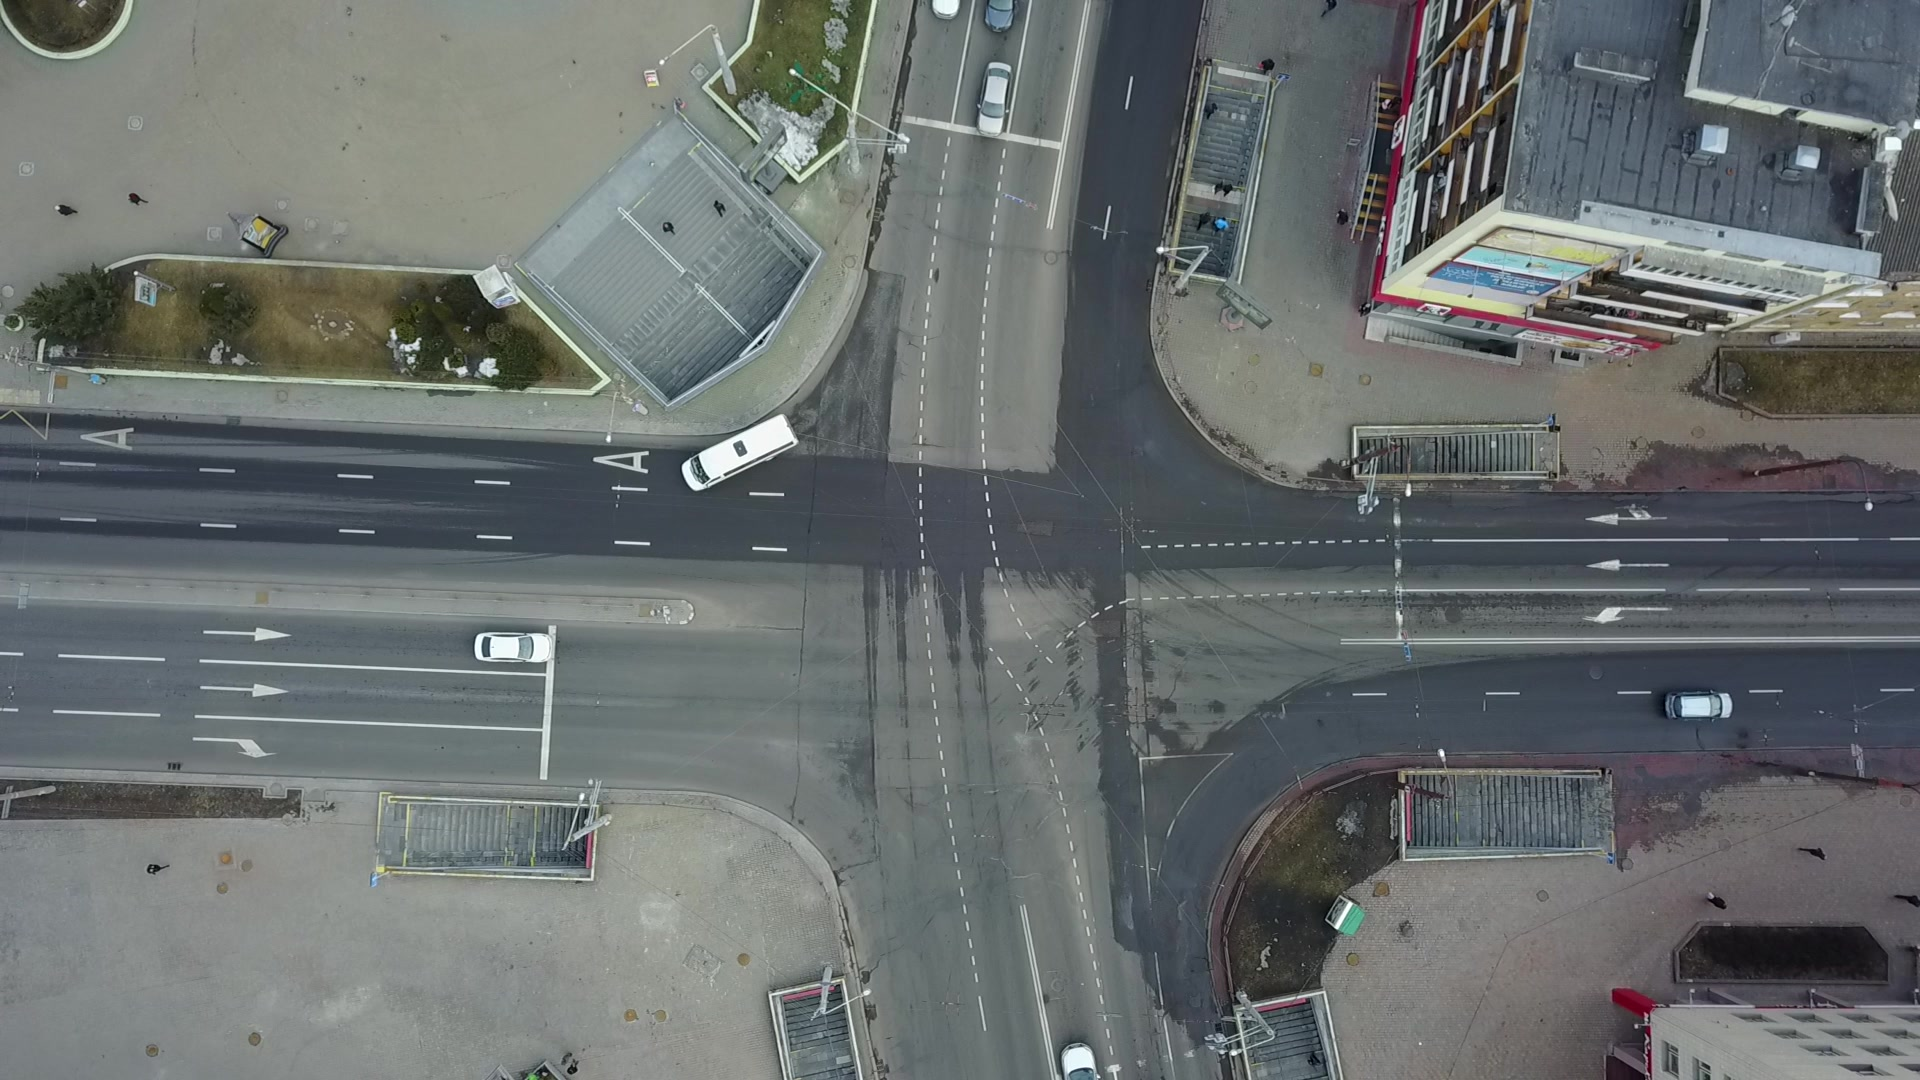

In [7]:
# Probemos de nuevo bajando el umbral de confianza (conf=0.1)
# Esto le dice: "Si estás al menos un 10% seguro de que es un auto, márcalo"
results = model(test_image, conf=0.10)

# Mostrar resultado
res_plotted = results[0].plot()
display(Image.fromarray(res_plotted[..., ::-1]))

Mostrando gráficos de: /content/runs/detect/train2/results.png


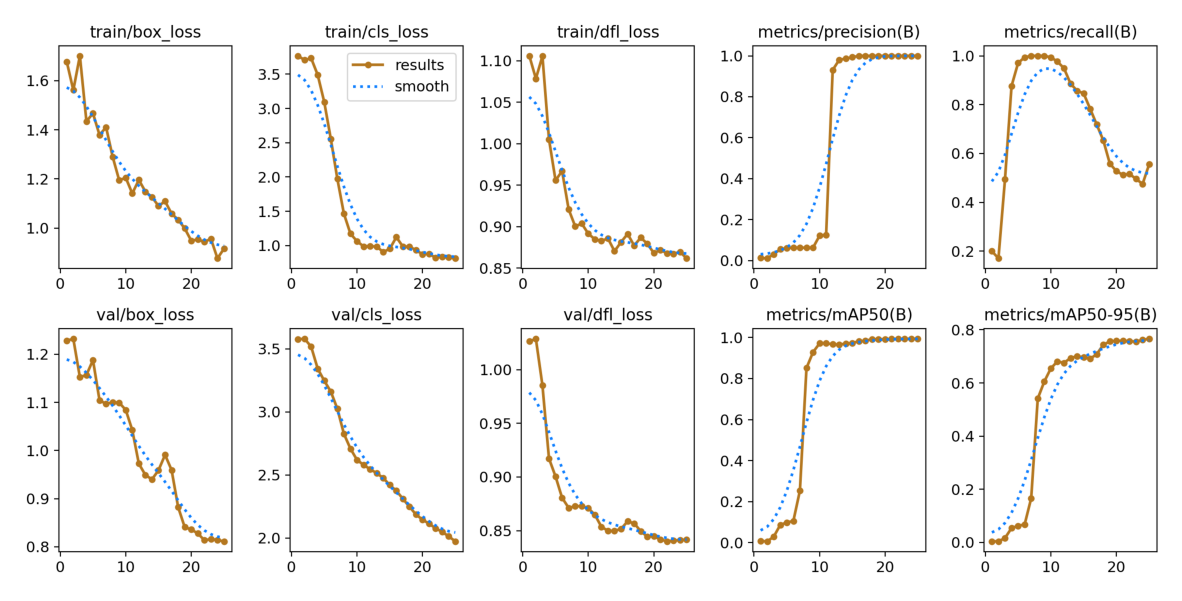

In [8]:
import matplotlib.pyplot as plt
import cv2

# Buscar la gráfica de resultados
results_path = '/content/runs/detect/train/results.png' # A veces es train2, train3...
if not os.path.exists(results_path):
    # Buscar la carpeta más reciente si 'train' no existe
    import glob
    runs = sorted(glob.glob('/content/runs/detect/train*'))
    results_path = os.path.join(runs[-1], 'results.png')

print(f"Mostrando gráficos de: {results_path}")

img_results = cv2.imread(results_path)
plt.figure(figsize=(15, 10))
plt.imshow(img_results)
plt.axis('off')
plt.show()